### Chapter 4.3 
# Engset Model

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

The Engset model considers a finite population. 
In contrast to models with Poisson arrival processes, where arriving traffic flows are thought of to be generated by an infinite number of customers, we consider here -- more realistically -- a finite number $m$ of customers that generate the arrival traffic ($m > n$). Note for $m<n$, a customer is always served and no blocking occurs. 

After a service period or after an unsuccessful attempt where the customer is blocked, the customer returns to the state *idle*. The service stage consists of $n$ servers with (negative) exponentially distributed service time.

## State Probability 
The offered traffic of an idle customer is $a^*=\frac{\alpha}{\mu}$. The state probabilities are:

$
 x(i) = P(X=i)= \frac{\displaystyle{\binom{m}{i}} \, {a^{*^i}}}
           {\displaystyle\sum_{k=0}^n \binom{m}{k} \, {a^{*^k}}} 
$
for $i = 0,1,\ldots, n$ in statistical equilibrium.

## Arrival Theorem
In general, the system state $i$ as seen by an incoming customer has a different distribution than the state seen by a random observer. In queueing theory, the arrival theorem (also referred to as the random observer property) states that upon arrival at a server, a customer observes the system as if in steady state at an arbitrary instant for the system without that customer.

For closed networks, i.e. with a finite number of $m$ customers, the state probabilities $x^m_A(i)$ seen by a customer entering a state $i$ are the same as the arbitrary-time probabilities $x^{m-1}(i)$ in a system with $m - 1$ customers.

## State Probability for Arriving Customer
The arrival theorem is now applied to the state probabilities.

$
 x_A(i) = \frac{\displaystyle{\binom{m-1}{i}} \, {a^*}^i}
                 {\displaystyle\sum_{k=0}^n {\binom{m-1}{k}} \,
                 {a^*}^k} \, .
$

## Engset Formula
A blocking event occurs in case the test customer finds the system state [$ X_A = n $]. We
finally obtain the following relationship called the Engset formula:

$p_B = x_A(n)$

In [6]:
import numpy as np
from scipy.special import gamma, binom, factorial

# Engset formula (for single value of alpha)
def engset_single(n,m,al,mu):
    if n>=m:
        return 0
    else:                                         
        astar = al/mu                  
        #a = astar*m
        k = np.arange(n+1)        
        denom = np.sum(binom(m-1,k)*astar**k)    
        return binom(m-1,n)*astar**n / denom
    
# vector of alphas allowed
def engsetPB_alpha(n, m, alpha, mu):
    pb = np.zeros_like(alpha)
    if n>=m:
        return pb
    else:
        if np.isscalar(alpha):
            return engset_single(n,m,alpha,mu)
        else:
            for i, al in enumerate(alpha):                
                pb[i] = engset_single(n,m,al,mu)
        return pb
    
# Erlang-B formula
def erlangb(a, n):    
    InvB = 1.0
    for j in range(1, n+1):
        InvB = 1.0 + InvB * (j/a)        
    return (1.0 / InvB)    


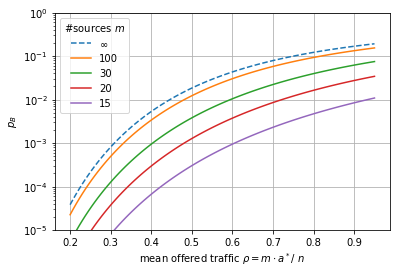

In [7]:
import matplotlib.pyplot as plt

rhos = np.linspace(0.2,0.95,100)
ms = [15,20,30,100][::-1]
n = 10

plt.plot(rhos, erlangb(rhos*n, n), '--', label='$\infty$')

mu = 1
for k, m in enumerate(ms):            
    a = rhos*n/m
    alpha = a*mu
    pb = engsetPB_alpha(n, m, alpha, mu)
    plt.plot(rhos,  engsetPB_alpha(n, m, alpha, mu), '-', label=m)
    

plt.xlabel('mean offered traffic $\\rho= m \cdot a^* /~ n$')
plt.ylabel('$p_B$')
plt.grid(which='major')
plt.yscale('log')
plt.ylim([1e-5, 1])
plt.legend(title='#sources $m$');